In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [63]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [64]:
df[["gender", "smoking_history"]].describe()

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [65]:
out_dir = "C:\\Users\\nikok\\Dropbox\\Leipzig\\Uni\\Semester 2\\Intro Computing\\Groupwork\\research\\img"

In [66]:
def countplot(column: str):
    n_bars = len(df[column].unique())
    plt.figure(figsize=(n_bars,4))
    sns.countplot(df, x=column)
    plt.savefig(f"{out_dir}\\{column}_countplot.png", bbox_inches="tight")

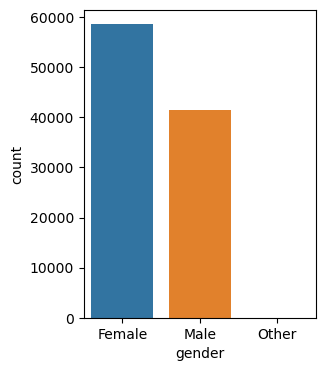

In [67]:
countplot("gender")

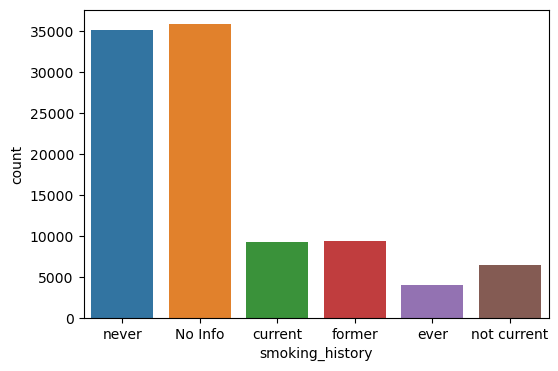

In [68]:
countplot("smoking_history")

In [69]:
numeric_df = df[["age", "bmi", "HbA1c_level", "blood_glucose_level"]]

In [83]:
from matplotlib.axes import Axes
def stacked_bar(ax: Axes, column):
    bottom = np.zeros(1)
    for value in df[column].value_counts():
        ax.bar("count", value, bottom=bottom)
        ax.yaxis.set_ticks([])
        bottom += value

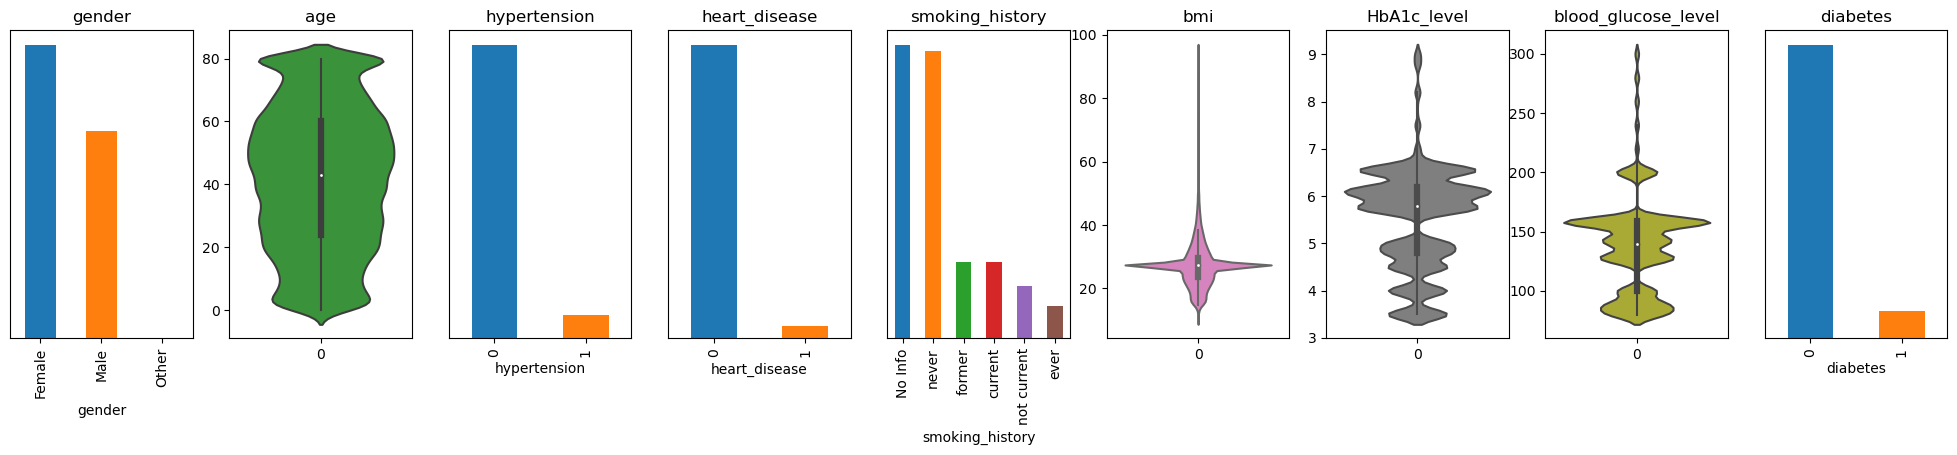

In [113]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(25,4))
for i, column in enumerate(df):
    if column in numeric_df:
        sns.violinplot(df[column], color=sns.color_palette()[i + 1], ax=axes[i])
    else: 
        df[column].value_counts().plot.bar(color=sns.color_palette(), ax=axes[i])
        axes[i].set_yticks([])   
    axes[i].set_title(column)
plt.savefig(out_dir + "\\df_plots.png", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


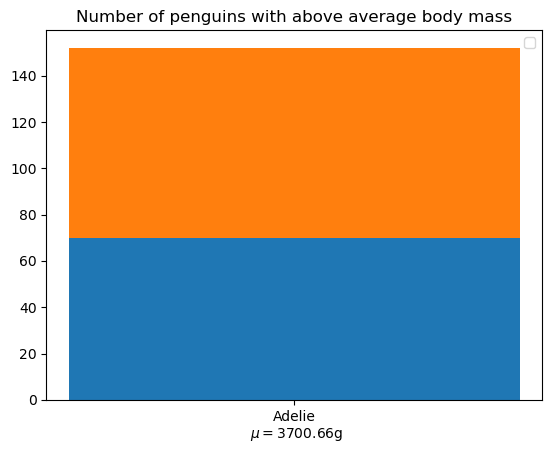

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
)
weight_counts = {
    "Below": np.array([70]),
    "Above": np.array([82]),
}
width = 0.2

fig, ax = plt.subplots()
bottom = np.zeros(1)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

<Axes: xlabel='diabetes'>

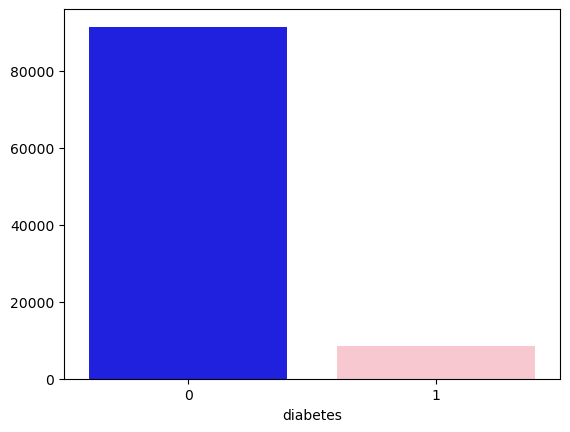

In [79]:
sns.barplot(x=df["diabetes"].value_counts().index, y=df["diabetes"].value_counts().values, palette=['blue', 'pink'])